```{eval-rst}
.. _supported-features:
```

# Supported Features

`vindex` was developed in response to a specific problem (see [Initial Scientific Challenge](#scientific_challenge)), which is why the current implementation does not support the full range of features of the original function.

## What Is Supported?

`fast-vindex` supports indexing using an `N-dimensional list of observations`.

### Example: The Basic Case

The basic case involves extracting a set of minicubes (observations) from a datacube. In 2D, this is illustrated by the following example:

In [1]:
import numpy as np
from fast_vindex import patched_vindex

from fast_vindex.testing import (
    generate_darray,
    DaskArray2D,
)

Here is a classic datacube with the indexes we want to extract.

In [2]:
x = generate_darray(shape=(9, 9), chunks=(3, 3), fmt="dindices")
x

dask.array<array, shape=(9, 9), dtype=object, chunksize=(3, 3), chunktype=numpy.ndarray>

In [3]:
indexes = (
    np.array([1, 2, 3, 4, 5, 6]).reshape(2, 3, 1), 
    np.array([4, 5, 6, 1, 2, 3]).reshape(2, 1, 3),
)
indexes

(array([[[1],
         [2],
         [3]],
 
        [[4],
         [5],
         [6]]]),
 array([[[4, 5, 6]],
 
        [[1, 2, 3]]]))

Here is a representation of the minicubes to be extracted within the datacube.

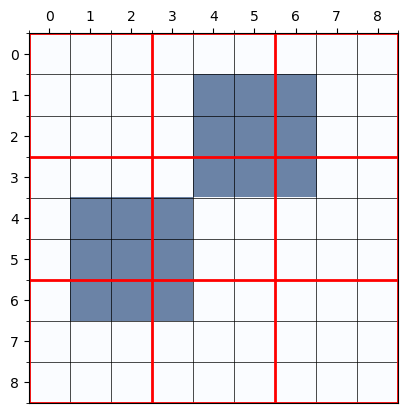

In [4]:
da2d = DaskArray2D(x)
da2d[indexes]

In [5]:
with patched_vindex():
    result = x.vindex[indexes]
values = result.compute()